In [1]:
import pandas as pd 
import plotly.offline as plt
import plotly.graph_objs as go
import numpy as np
import dash         
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly         
import plotly.express as px

In [2]:
athlete_events_df = pd.read_csv("athlete_events.csv")

In [3]:
print("Athletes and Events data -  rows:", athlete_events_df.shape[0]," columns:", athlete_events_df.shape[1])

Athletes and Events data -  rows: 271116  columns: 15


In [4]:
athlete_events_df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


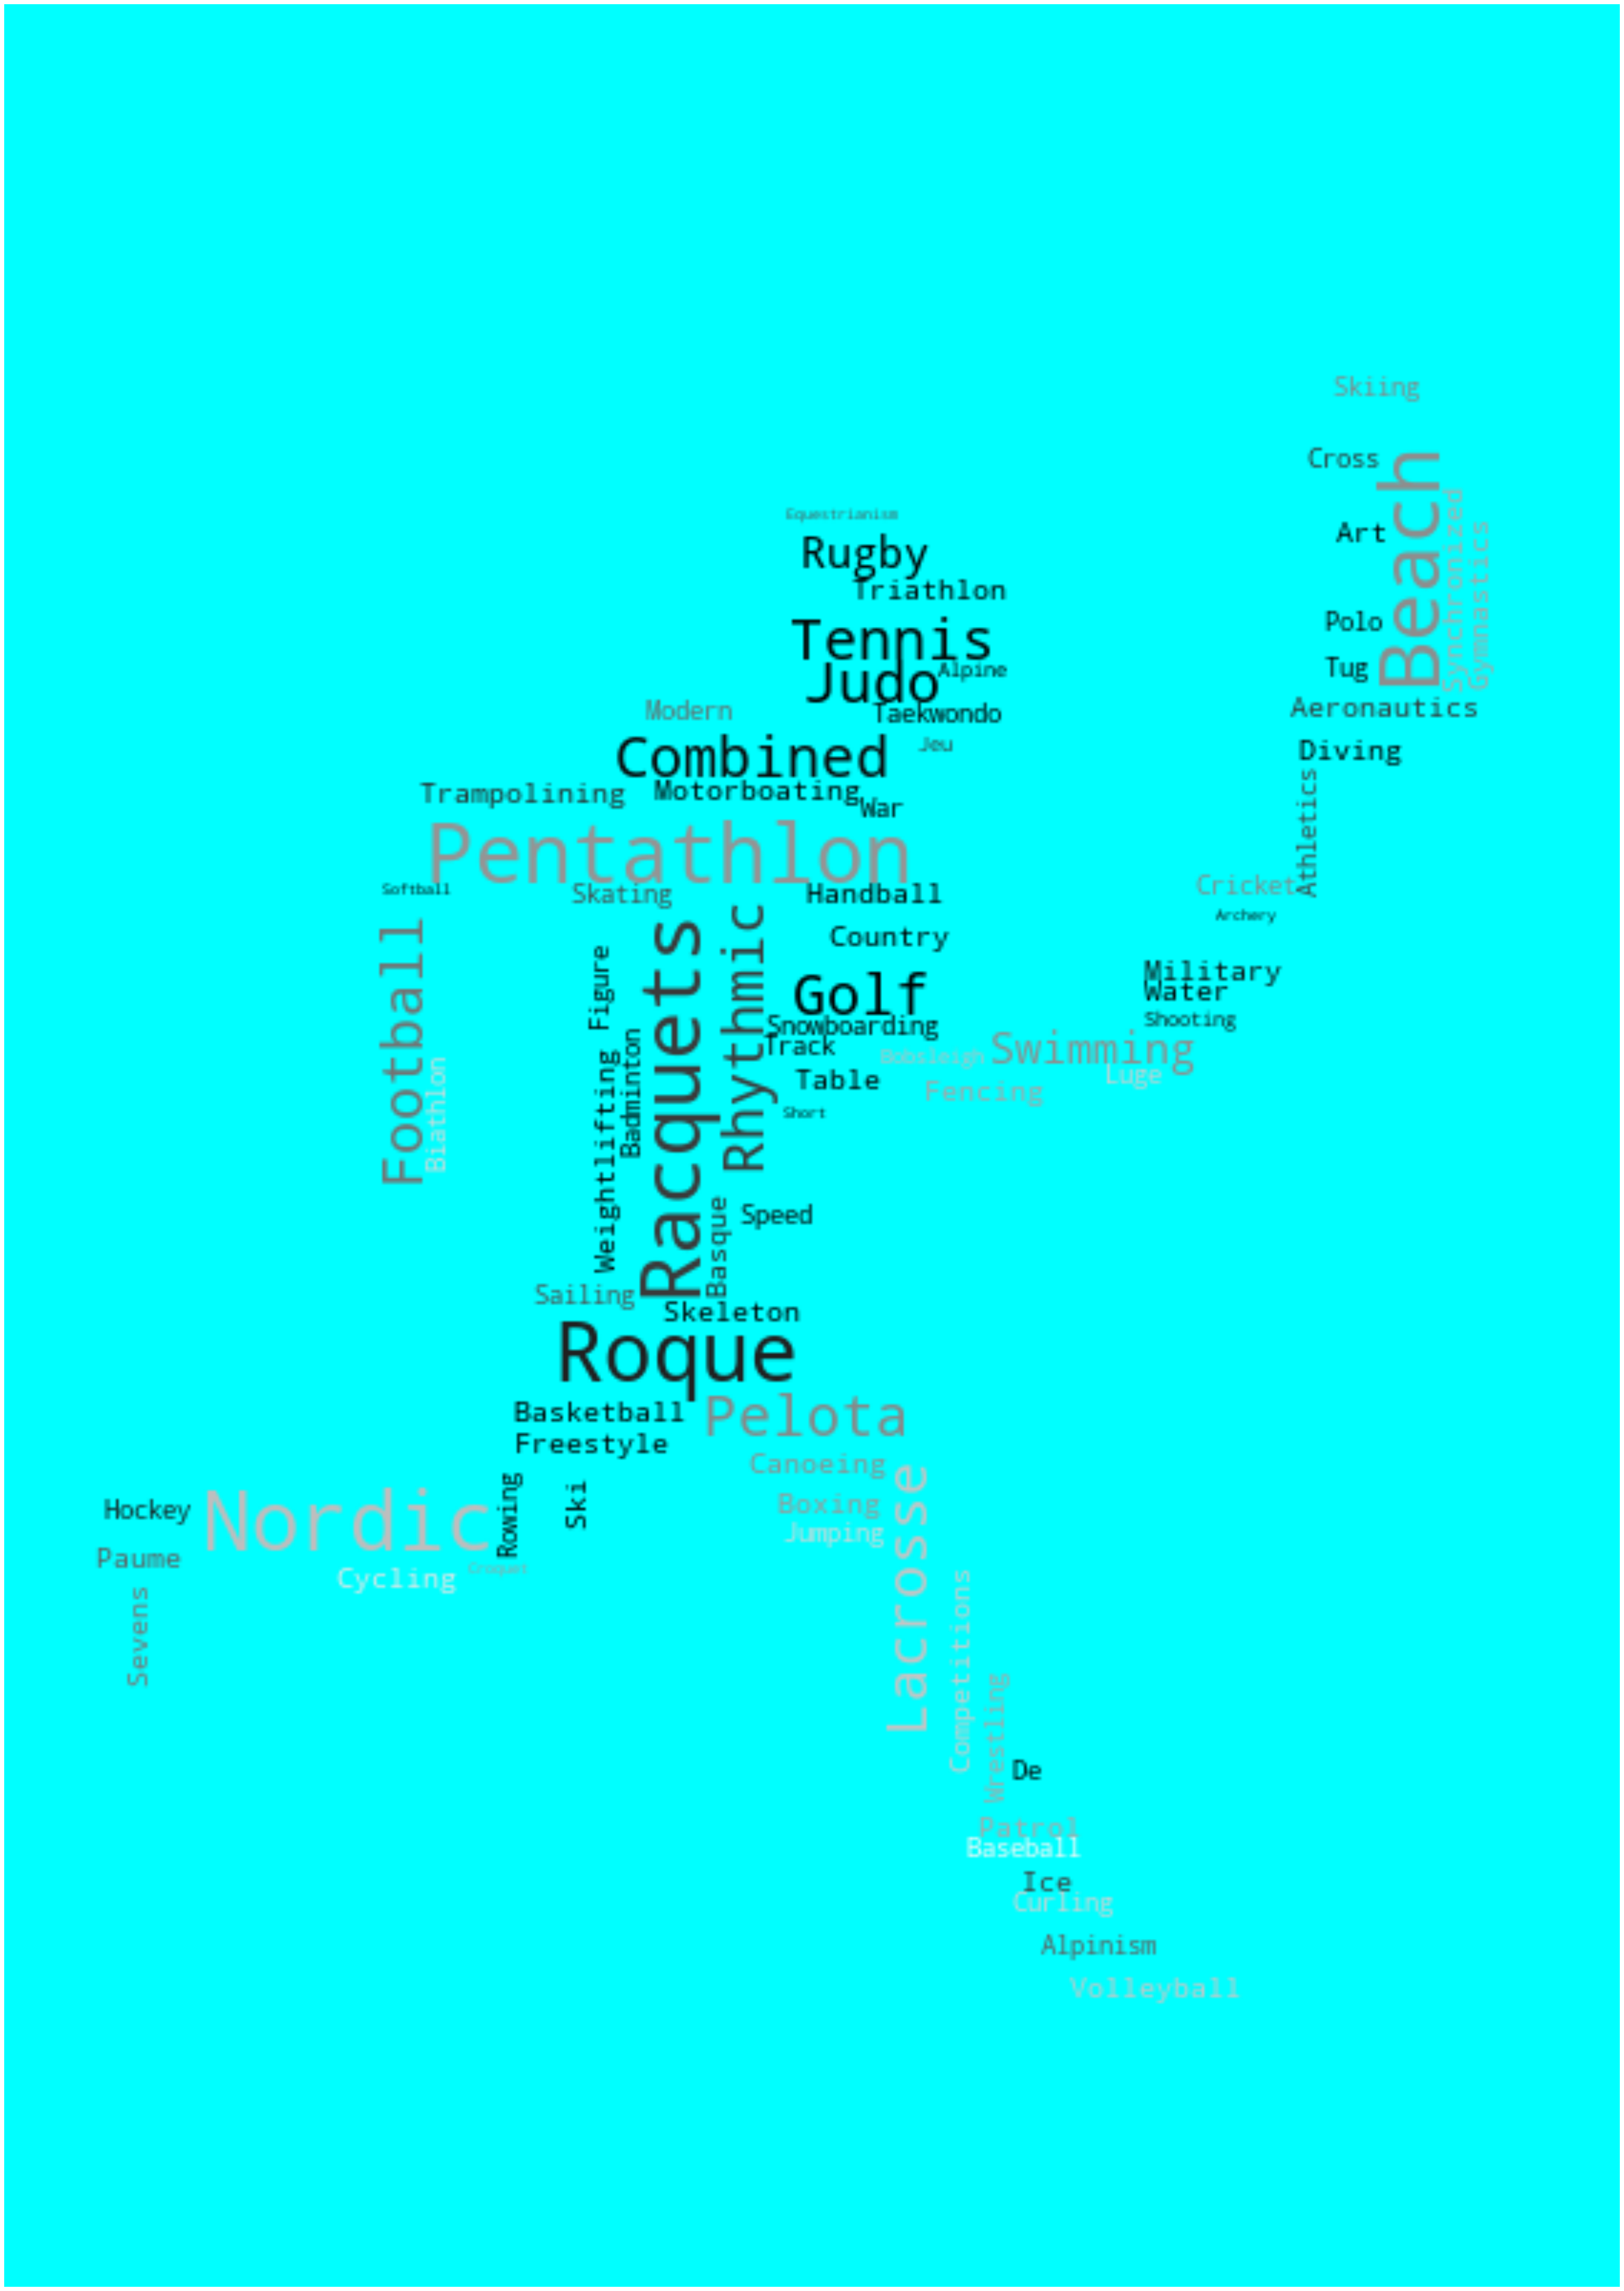

In [5]:
# modules for generating the word cloud
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
fields = ['Sport']
text2 = pd.read_csv('athlete_events.csv', usecols=fields)
text3 = ' '.join(text2['Sport'])
text3=text3.split()
text3=set(text3)
text3=list(text3)
text3=" ".join(text3)
mask2 = np.array(Image.open('newsol.png'))
wc = WordCloud(background_color="aqua", max_words=2000, mask=mask2,
               max_font_size=90, random_state=35)
wc.generate(text3)
# create coloring from image
image_colors = ImageColorGenerator(mask2)
plt.figure(figsize=[70,70])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
def top_participants(data=athlete_events_df):
    
    participants = data.groupby(by=['Year', 'Sport']).size().groupby(level=0).nlargest(5).droplevel(0).to_frame().reset_index()
    years = ['Year ' + str(yr) for yr in participants['Year'].unique()]

    participants = participants.groupby(by='Year')

    colors = ['#004D40', '#00897B', '#4DB6AC', '#B2DFDB', '#E0F2F1']

    fig = go.Figure(
        [go.Barpolar(r=participants.nth(i)[0], name='', text=participants.nth(i)['Sport'], marker_color=colors[i],
                     theta=years)
         for i in range(4, -1, -1)],
        go.Layout(height=1000, title='Top 5 popular Sports in Olympic History',
                  polar_bgcolor='#212121', paper_bgcolor='#212121',
                  font_size=15, font_color='#FFFFFF',
                  polar=dict(radialaxis=dict(visible=False)))
    )
    
    return fig

app = dash.Dash()
fig = top_participants()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
